In [1]:
!pip install --upgrade gensim

    100% |████████████████████████████████| 23.5MB 1.1MB/s 
    100% |████████████████████████████████| 1.4MB 14.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
from gensim.models import Word2Vec

In [0]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [0]:
# train model
model = Word2Vec(sentences, min_count=1)

In [7]:
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [8]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [10]:
# access vector for one word
print(model['this'])

[ 2.4498124e-03 -4.5085088e-03  4.5886874e-04 -3.8779550e-03
  2.3178509e-04  1.8868864e-03 -3.4601779e-03  4.2333500e-03
  2.8018993e-03 -3.9469497e-03 -2.8828118e-04 -4.2333282e-03
  4.2757131e-03  3.1607703e-03 -1.7395102e-03 -7.5622083e-04
 -1.9261946e-03 -2.0615335e-03 -4.1354690e-03 -1.4495826e-03
  2.8588709e-03  3.1790910e-03 -3.0738028e-04  1.1657632e-03
 -3.5014309e-03  3.1468840e-03  2.7572918e-03  2.6408448e-03
 -6.1060191e-04 -4.6373103e-03 -2.6816176e-03 -9.7126095e-04
 -4.7714370e-03  2.5109760e-03 -3.1944993e-03 -4.0013761e-05
 -1.4945021e-03 -4.0659038e-03  6.9710723e-04 -4.1046645e-03
  2.6505198e-03  2.1938977e-03 -2.5682568e-03  4.8152525e-03
  2.3425752e-03 -4.3797810e-03 -4.9427901e-03 -2.5134992e-03
  2.2351651e-03  3.7936079e-03 -2.4409024e-03 -2.8604078e-03
  2.8672840e-03  4.8549646e-03  3.7961811e-04 -3.4627542e-04
 -2.1374646e-04  2.7131636e-03 -2.0695531e-03 -3.2147742e-03
  3.8844254e-03  3.7921072e-04 -3.4897702e-03 -1.0244888e-03
  2.9241345e-03  5.22791

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
# save model
model.save('model.bin')

In [12]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [13]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

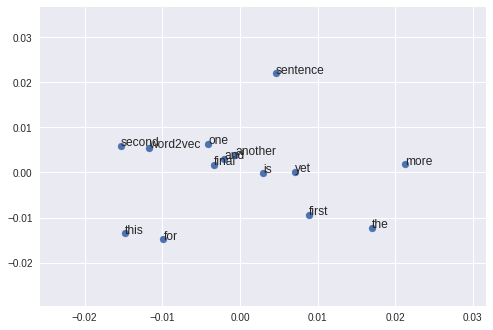

In [15]:
from matplotlib import pyplot
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('/content')
try:
  os.makedirs(local_download_path)
except: pass

In [20]:
!pwd

/content


In [19]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'root' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))

title: Colab Notebooks, id: 1ppcIKiJtiJZ0T946e59DtApdzuWK0bmj
downloading to /content/Colab Notebooks
title: Lenguajes, id: 1GWApwwYk-4WMNKPQiNqT75mvGDXtJvUA
downloading to /content/Lenguajes
title: Modelos, id: 1-puu2JiRuSuac_NTnPtZh-w9b243Kjmp
downloading to /content/Modelos
title: ProgPLN, id: 1iJ1Yw3Rvsq8jtCAQkh0VQZ-J827zPTOn
downloading to /content/ProgPLN
title: altImages.rtf, id: 1z6pLh2A63bHDydPCWPccfvCELeah5YsTnCU5zy6akQo
downloading to /content/altImages.rtf
title: Invitación Profesores a Graduación 2018.pdf, id: 0B3C17k2PfdB1Z3ktYWtGLVNyRC1DaF9jRkhQbV9JVlRWOU8w
downloading to /content/Invitación Profesores a Graduación 2018.pdf
title: Lenguajes_16_05, id: 1J5DjzBQOY4ry4vxX854FQI_e4Al6mr0T
downloading to /content/Lenguajes_16_05
title: altImages.rtf, id: 1gOKKAQC5YDYkAMxGNIWvxAJIVRGoTs_Wc3Inl-0-Q8U
downloading to /content/altImages.rtf
title: UCM.zip, id: 1nBi_i1aUnEqg8WIryZf1q052kJcwUfan
downloading to /content/UCM.zip
title: pag10.png, id: 0B3C17k2PfdB1MzcxRW5IakcybnVCZU5tQ

In [22]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1ppcIKiJtiJZ0T946e59DtApdzuWK0bmj' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))

title: 12_1_word2vec.ipynb, id: 16tAw39Fdnh3W_Pj9p4BUzrBFDfmgvkFY
downloading to /content/12_1_word2vec.ipynb
title: 15_Babelfy_py2.ipynb, id: 1yp8w2K2E5yppgUuLZQQDH2MiSiN3KjWg
downloading to /content/15_Babelfy_py2.ipynb
title: 11_rasa.ipynb, id: 13kZCJKUFUFYOhMUKj29hHPFF8t2XzpXE
downloading to /content/11_rasa.ipynb
title: 11_2_rasa_curl.ipynb, id: 1tI7hfulzo7cRQ97GUdDRtpquXfapXLZb
downloading to /content/11_2_rasa_curl.ipynb
title: 8_textacy.ipynb, id: 1ZSQhgncvXHAOpyxEwcCCRTsBd0zxlKv2
downloading to /content/8_textacy.ipynb
title: 1_pipeline.ipynb, id: 10kJgSB-ZC2RQhUqOLuuTtpByLMvbiD5S
downloading to /content/1_pipeline.ipynb
title: 7_spacy_lingFeat.ipynb, id: 1ZH7oUWJWEOKgBnvqW3cNYJAZJopYiX2Y
downloading to /content/7_spacy_lingFeat.ipynb
title: 4_nltk_wordnet.ipynb, id: 1rKEGqNER1XNReZ_TXGh0oqtgP2KkfVcK
downloading to /content/4_nltk_wordnet.ipynb
title: 12_2_glove.ipynb, id: 1IlwvWemK-q2hhacCxx5F_MjbT7G0Xarp
downloading to /content/12_2_glove.ipynb
title: data_word2vec, id: 1AzQ

In [21]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1AzQpI5-EL2FR41rT6QeZOgN_3SrELnOG' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: GoogleNews-vectors-negative300.bin.gz, id: 1HPlUGgbfKYAC3ctnE9sVwP942gLdUEb1
downloading to /content/GoogleNews-vectors-negative300.bin.gz


In [22]:
!ls

adc.json	  demo-rasa.json			 model.bin  rasa_nlu
config_spacy.yml  GoogleNews-vectors-negative300.bin.gz  projects   sample_data


In [23]:
!7z e GoogleNews-vectors-negative300.bin.gz


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1647046227 bytes (1571 MiB)

Extracting archive: GoogleNews-vectors-negative300.bin.gz
--
Path = GoogleNews-vectors-negative300.bin.gz
Type = gzip
Headers Size = 45

  0% - GoogleNews-vectors-negative300.bin                                           1% - GoogleNews-vectors-negative300.bin                                           2% - GoogleNews-vectors-negative300.bin                                           3% - GoogleNews-vectors-negative300.bin

In [24]:
!ls

adc.json	  GoogleNews-vectors-negative300.bin	 projects
config_spacy.yml  GoogleNews-vectors-negative300.bin.gz  rasa_nlu
demo-rasa.json	  model.bin				 sample_data


In [0]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [1]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

NameError: ignored